## Machine Learning Model Building Pipeline: Model Building

In this section, we will cover Feature Engieering aspects of Machine Learning Model Building pipeline. For ease of understanding, we will create a separate notebook for each of the following parts of the Machine Learning pipeline. 
1. Data preparation and Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Feature Selection
4. Model Building

*This is the notebook for Model Building*

We will use the house price dataset available on [Kaggle.com]
<br/>(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 
<br/>See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning regression model to predict the price of home based on different attributes of the house. Obviously, being able to predict the price of the house is of great importance to both the buyer and seller of the house in addition to investors (to figure out whether the proposed price is either over estimated or under estimated)

### Goal of the modeling problem

The goal of the project is to predict the price of the house as close as possible to the actual sale price historically.

### Data for the problem

The data can be downloaded from the following website
<br/>https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
<br/>Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'Housing_Data.csv' and save it in a directory named "DataSets".

====================================================================================================

## House Prices dataset: Machine Learning Model build

In the following cells, we will finally build our machine learning models, utilising the engineered data and the pre-selected features. 


### Setting the seed

It is important to note, that we are engineering variables and pre-processing data with the idea of deploying the model if we find business value in it. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [42]:
# To handle datasets. These are standard imports
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# to display data with high width
pd.set_option('display.width', 1000)

# to build the models
from sklearn.linear_model import Lasso, LinearRegression

# to evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
# Make the output of notebook stable across runs by setting randon seed
np.random.seed(42)

# To make the pictures pretty
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Set up directories to work with datasets and images
PROJECT_ROOT_DIR = os.getcwd()
DATASET_FOLDER = "DataSets"    # Data goes into the DataSets folder
IMAGES_FOLDER = "IMAGES"       # Images go into IMAGES folder

DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, DATASET_FOLDER)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_FOLDER)

def load_data(filename, dataset_path=DATASET_PATH,**kwargs):
    """Helper Function to load data. Inputs are file name and directory where datasets are stored"""
    file_with_path = os.path.join(dataset_path, filename)
    return pd.read_csv(file_with_path,**kwargs)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Helper Function to save data. Inputs are file name and directory where datasets are stored"""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# load dataset
# We  load the datasets with the engineered values: we built and saved these datasets in the previous lecture.
# If you haven't done so, go ahead and check the previous lecture / notebook to find out how to create these datasets

X_train = load_data(filename="xtrain.csv")
X_test = load_data(filename="xtest.csv")

# visualise the dataset by printing the first three rows
print("\nThe first 5 rows of training data frame:")
X_train.head()


The first 5 rows of training data frame:


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,1.0,0.461171,0.377048,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.777778,0.50,0.014706,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.0,0.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.000000,0.0,1.0,0.018692,0.0,0.75,0.430183,0.333333,0.666667,0.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.75,0.5,1.0,0.0,0.0,0.0
1,657,11.887931,0.000000,1.0,0.456066,0.399443,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.444444,0.75,0.360294,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.03375,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.0,0.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.0,0.250000,1.0,0.000000,0.0,1.0,0.457944,0.0,0.25,0.220028,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.50,0.5,1.0,0.0,0.0,0.0
2,46,12.675764,0.588235,1.0,0.394699,0.347082,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.888889,0.50,0.036765,0.098361,0.25,0.285714,0.6,0.666667,0.5,0.25750,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.0,0.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.0,0.333333,1.0,0.333333,0.0,1.0,0.046729,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.090909,1.00,0.5,1.0,0.0,0.0,0.0
3,1349,12.278393,0.000000,1.0,0.388581,0.493677,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.666667,0.50,0.066176,0.163934,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.0,0.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.0,0.250000,1.0,0.333333,0.0,1.0,0.084112,0.0,0.50,0.362482,0.333333,0.666667,0.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.25,0.5,1.0,1.0,0.0,0.0
4,56,12.103486,0.000000,1.0,0.577658,0.402702,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.555556,0.50,0.323529,0.737705,0.25,0.285714,0.6,0.666667,0.5,0.17000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.086818,0.0,0.0,0.434278,0.233224,1.0,1.0,0.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.333333,0.0,1.0,0.411215,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.50,0.5,1.0,0.0,0.0,0.0


In [4]:
# capture the target
if 'SalePrice' in X_train.columns:
    y_train = X_train['SalePrice']
    y_test = X_test['SalePrice']
else:
    print("SalePrice column not found. May be data frame is wrong!")

In [5]:
# load selected features
features = load_data(filename="selected_features.csv", header=None)
features = [x for x in features[0]] 

# here I will add this last feature, even though it was not selected in our previous step,
# because it needs key feature engineering steps that I want to discuss further during the deployment
features = features + ['LotFrontage'] 

features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'GarageYrBlt_na',
 'LotFrontage']

In [6]:
# reduce the train and test set to include only the desired features
X_train = X_train[features]
X_test = X_test[features]

### Ordinary Least Squares linear regression

In [30]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
pred = lin_model.predict(X_train)
print('OLS train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('OLS train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = lin_model.predict(X_test)
print('OLS test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('OLS test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

OLS train mse: 1054210579.0172877
OLS train rmse: 32468.60913278066

OLS test mse: 791846538.6572584
OLS test rmse: 28139.767921169114

Average house price:  163000.00000000012


Text(0.5, 1.0, 'Evaluation of Ordinary Least Squares')

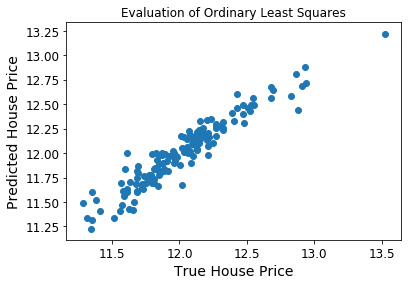

In [32]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Ordinary Least Squares')

### Regularised linear regression

Remember to set the seed.

In [39]:
# train the model
lin_model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
# evaluate the model:
# remember that we log transformed the output (SalePrice) during feature engineering

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions back to the original house prices values.

# We will evaluate performance using the mean squared error and the root of the mean squared error

pred = lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = lin_model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 1315114590.6956143
linear train rmse: 36264.50869232361

linear test mse: 1428415366.8559754
linear test rmse: 37794.38274209509

Average house price:  163000.00000000012


In [46]:
print('Mean Absolute Error:', mean_absolute_error(np.exp(y_test), np.exp(pred)))  
print('Mean Squared Error:', mean_squared_error(np.exp(y_test), np.exp(pred)))   
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))  

Mean Absolute Error: 20494.098975267305
Mean Squared Error: 1428415366.8559754
Root Mean Squared Error: 37794.38274209509


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

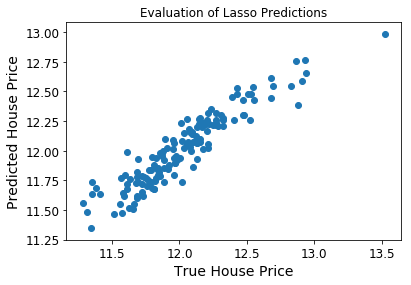

In [41]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

We can see that our model is doing a pretty good job at estimating house prices.

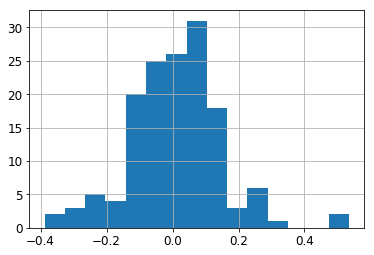

In [36]:
# let's evaluate the distribution of the errors. They should be fairly normally distributed, if not there is a bias.

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=15)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Random Forest

Remember to set the seed.

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
pred = regressor.predict(X_train)
print('Random Forest train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('Random Forest rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = regressor.predict(X_test)
print('Random Forest test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('Random Forest test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

Random Forest train mse: 184828276.85005364
Random Forest rmse: 13595.156374608334

Random Forest test mse: 1326533259.8177261
Random Forest test rmse: 36421.60430043858

Average house price:  163000.00000000012


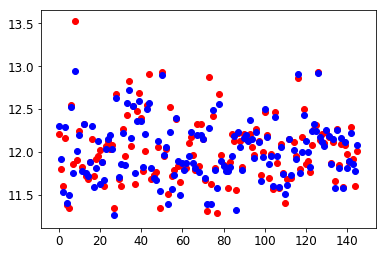

In [26]:
plt.scatter(X_test.index, y_test, color='red')
plt.scatter(X_test.index, regressor.predict(X_test), color='blue')

Text(0.5, 1.0, 'Evaluation of Random Forest')

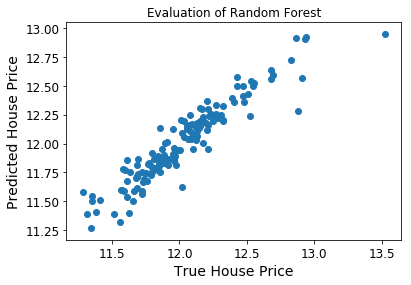

In [28]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, regressor.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Random Forest')

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

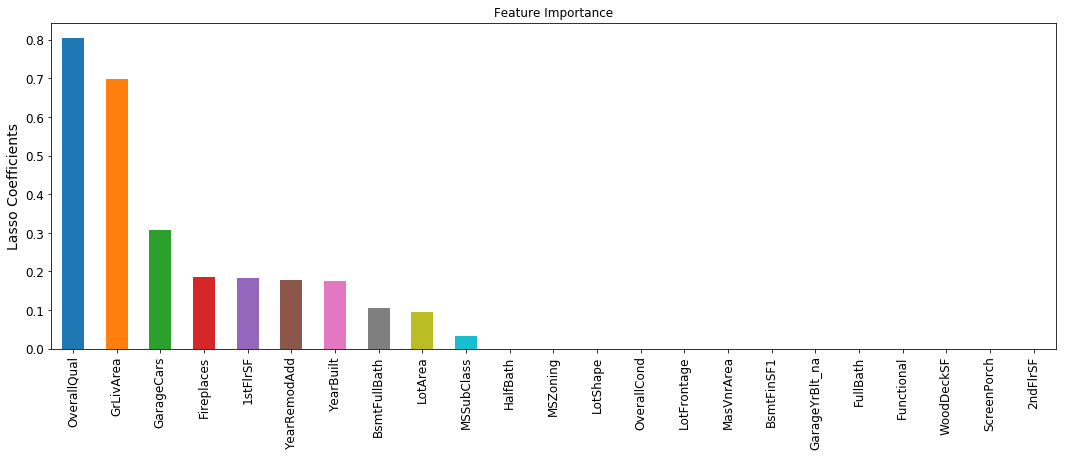

In [55]:
# Lets look at what features contribute mostly for the final prediction

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')